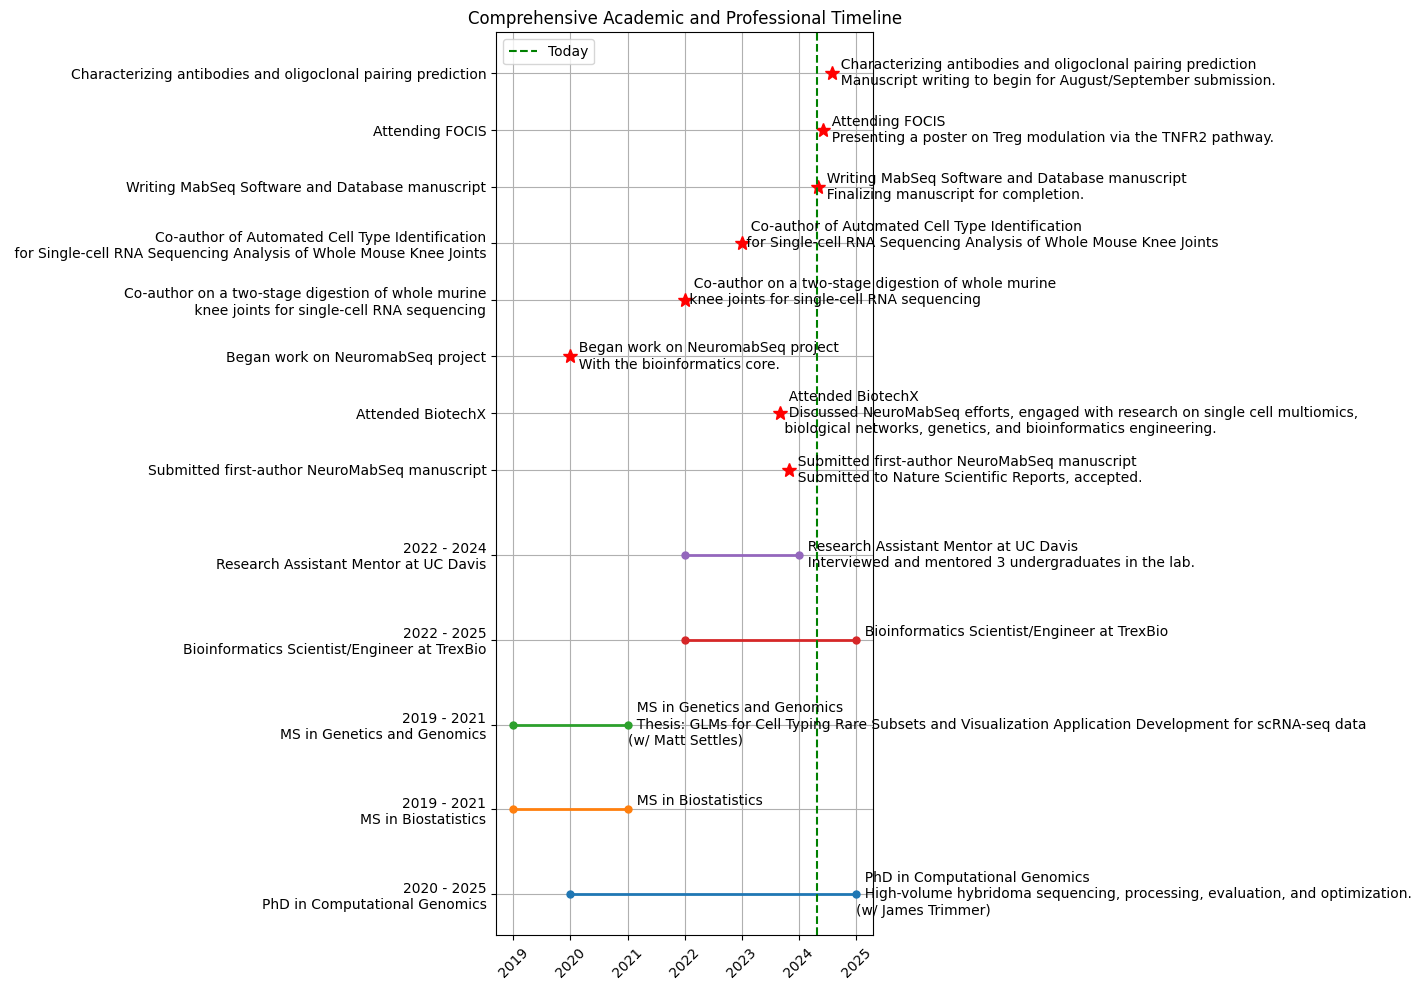

In [12]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

# Define the academic records and additional events
records = [
    {"degree": "PhD in Computational Genomics", "start": "2020", "end": "2025",
     "details": "High-volume hybridoma sequencing, processing, evaluation, and optimization.\n(w/ James Trimmer)"},
    {"degree": "MS in Biostatistics", "start": "2019", "end": "2021",
     "details": ""},
    {"degree": "MS in Genetics and Genomics", "start": "2019", "end": "2021",
     "details": "Thesis: GLMs for Cell Typing Rare Subsets and Visualization Application Development for scRNA-seq data\n(w/ Matt Settles)"},
    {"degree": "Bioinformatics Scientist/Engineer at TrexBio", "start": "2022", "end": "2025",
     "details": ""},
     # add september 2022 - july 2023 mentorship with Harrison
    {"degree": "Research Assistant Mentor at UC Davis", "start": "2022", "end": "2024", "details": "Interviewed and mentored 3 undergraduates in the lab."},
]

events = [
    {"title": "Submitted first-author NeuroMabSeq manuscript", "date": "2023-11", "details": "Submitted to Nature Scientific Reports, accepted."},
    {"title": "Attended BiotechX", "date": "2023-09", "details": "Discussed NeuroMabSeq efforts, engaged with research on single cell multiomics, \n biological networks, genetics, and bioinformatics engineering."},
    {"title": "Began work on NeuromabSeq project", "date": "2020-01", "details": "With the bioinformatics core."},
    {"title": "Co-author on a two-stage digestion of whole murine\n knee joints for single-cell RNA sequencing", "date": "2022-01", "details": ""},
    {"title": "Co-author of Automated Cell Type Identification\n for Single-cell RNA Sequencing Analysis of Whole Mouse Knee Joints", "date": "2023-01", "details": ""},
    {"title": "Writing MabSeq Software and Database manuscript", "date": "2024-05", "details": "Finalizing manuscript for completion."},
    {"title": "Attending FOCIS", "date": "2024-06", "details": "Presenting a poster on Treg modulation via the TNFR2 pathway."},
    {"title": "Characterizing antibodies and oligoclonal pairing prediction", "date": "2024-08", "details": "Manuscript writing to begin for August/September submission."}
]


# Parse dates for records and events
for record in records:
    record["start_date"] = datetime.strptime(record["start"], "%Y")
    record["end_date"] = datetime.strptime(record["end"], "%Y")

for event in events:
    event["date"] = datetime.strptime(event["date"], "%Y-%m")

# Calculate positions for academic records and events separately to avoid overlap
academic_positions = [i*3 for i in range(len(records))]
event_positions = [len(records)*3 + i*2 for i in range(len(events))]

# Current date for vertical line
current_date = datetime.now()

# Plotting the timeline
fig, ax = plt.subplots(figsize=(14, 10))

# Plot academic records
for i, record in enumerate(records):
    ax.plot([record["start_date"], record["end_date"]], [academic_positions[i], academic_positions[i]], marker='o', linestyle='-', linewidth=2, markersize=5)
    ax.text(record["end_date"], academic_positions[i], f"  {record['degree']}\n  {record['details']}", verticalalignment='center')

# Plot events
for i, event in enumerate(events):
    ax.plot(event["date"], event_positions[i], marker='*', color='red', markersize=10)
    ax.text(event["date"], event_positions[i], f"  {event['title']}\n  {event['details']}", verticalalignment='center')

# Add a vertical line for today's date
ax.axvline(x=current_date, color="green", linestyle="--", label="Today")

# Set y-ticks and labels
all_positions = academic_positions + event_positions
all_labels = [f"{record['start']} - {record['end']}\n{record['degree']}" for record in records] + [event['title'] for event in events]
ax.set_yticks(all_positions)
ax.set_yticklabels(all_labels)

# Set x-axis major locator and formatter
ax.get_xaxis().set_major_locator(mdates.YearLocator())
ax.get_xaxis().set_major_formatter(mdates.DateFormatter('%Y'))

plt.xticks(rotation=45)
plt.title("Comprehensive Academic and Professional Timeline")
ax.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
